## Stock Market Analysis

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from pandas.io.data import DataReader
from datetime import datetime
from __future__ import division

/Users/abhisheksubramanian/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/abhisheksubramanian/anaconda/lib/python2.7/site-packages/pandas/io/data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [2]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [7]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-01-23,112.300003,113.750000,111.529999,112.980003,46464800,111.087261
2015-01-26,113.739998,114.360001,112.800003,113.099998,55615000,111.205246
2015-01-27,112.419998,112.480003,109.029999,109.139999,95568700,107.311588
2015-01-28,117.629997,118.120003,115.309998,115.309998,146477100,113.378221
2015-01-29,116.320000,119.190002,115.559998,118.900002,84436400,116.908082


In [3]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,119.607817,120.692778,118.302461,119.482976,5.216357e+07,118.605994
std,8.774349,8.540621,8.999758,8.763971,2.132813e+07,8.314116
min,94.870003,97.709999,92.000000,96.300003,1.302370e+07,96.300003
25%,113.174999,114.357500,111.967501,113.372502,3.735410e+07,112.953997
50%,120.795002,121.584999,119.349998,120.299999,4.727270e+07,119.658136
75%,127.142502,127.907497,125.982502,126.912502,6.191150e+07,125.492359
max,134.460007,134.539993,131.399994,133.000000,1.622063e+08,131.380384


In [9]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-01-23 to 2016-01-22
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [6]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-01-23,112.300003,113.750000,111.529999,112.980003,46464800,111.087261
2015-01-26,113.739998,114.360001,112.800003,113.099998,55615000,111.205246
2015-01-27,112.419998,112.480003,109.029999,109.139999,95568700,107.311588
2015-01-28,117.629997,118.120003,115.309998,115.309998,146477100,113.378221
2015-01-29,116.320000,119.190002,115.559998,118.900002,84436400,116.908082


## Historical View of the Closing Prices

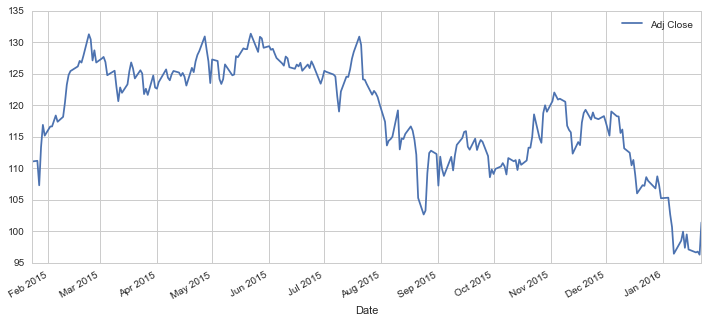

In [10]:
AAPL['Adj Close'].plot(legend=True,figsize=(12,5))

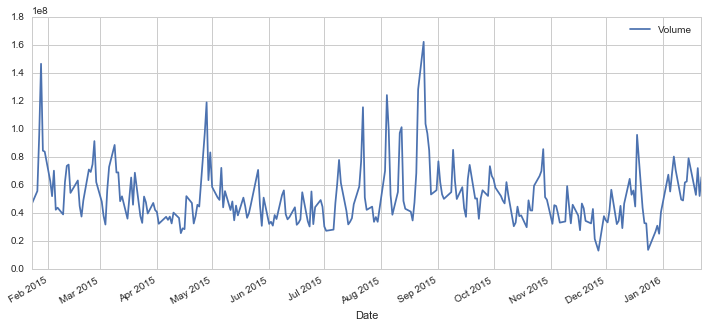

In [11]:
AAPL['Volume'].plot(legend=True,figsize=(12,5))

## Trends in the Data

In [12]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)
    

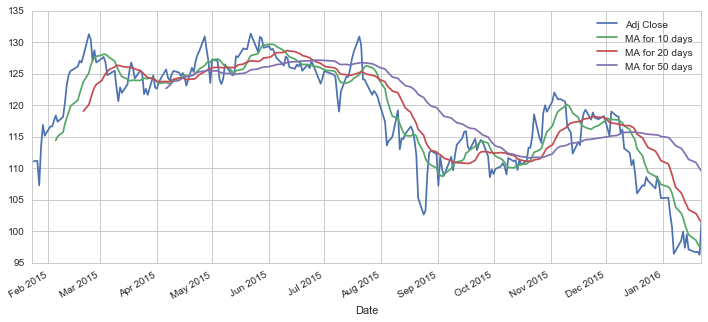

In [13]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(
     subplots=False,figsize=(12,5))

### Daily Returns 

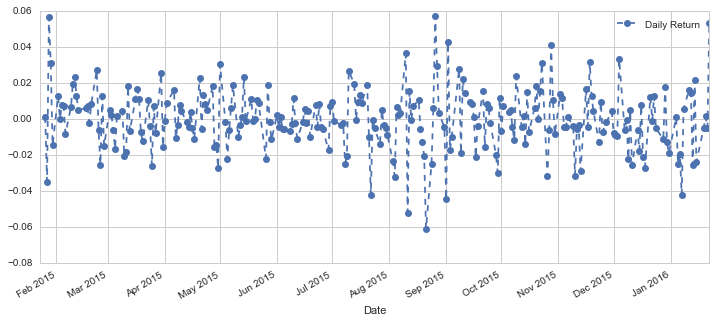

In [14]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(legend = True, figsize=(12,5),linestyle='--',marker='o')

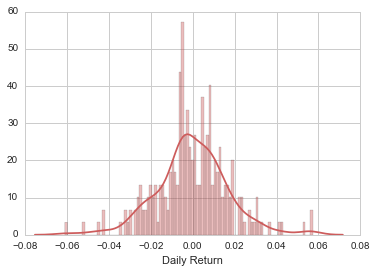

In [15]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='indianred')

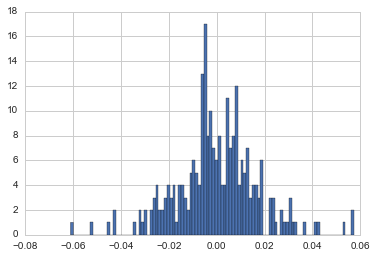

In [16]:
AAPL['Daily Return'].hist(bins=100)

###  To analyse Returns of all stocks in the list we build new data frame with Adj Close column 

In [17]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-01-23,111.087261,312.390015,539.952437,45.929627
2015-01-26,111.205246,309.660004,535.212448,45.764130
2015-01-27,107.311588,306.750000,518.632370,41.529416
2015-01-28,113.378221,303.910004,510.002318,40.098373
2015-01-29,116.908082,311.779999,510.662331,40.896641


In [18]:
tech_rets = closing_df.pct_change()

In [19]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-01-23,NaN,NaN,NaN,NaN
2015-01-26,0.001062,-0.008739,-0.008779,-0.003603
2015-01-27,-0.035013,-0.009397,-0.030978,-0.092533
2015-01-28,0.056533,-0.009258,-0.016640,-0.034459
2015-01-29,0.031134,0.025896,0.001294,0.019908


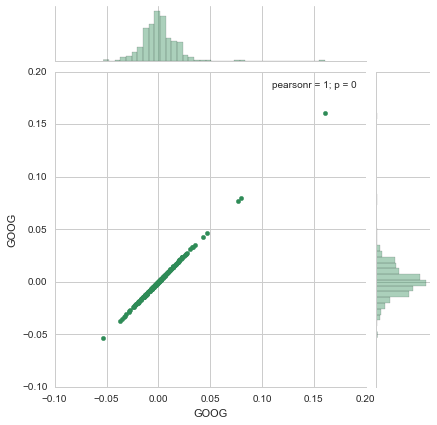

In [20]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

/Users/abhisheksubramanian/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


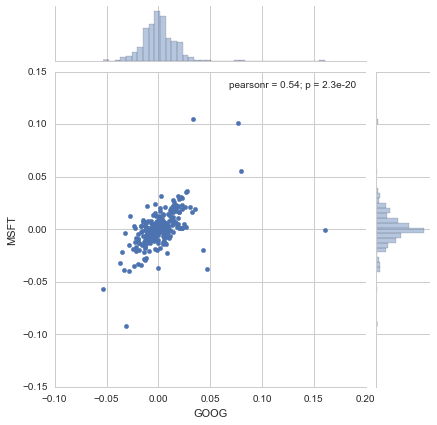

In [21]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

### Comparison analysis for various possibilities

In [22]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-01-23,NaN,NaN,NaN,NaN
2015-01-26,0.001062,-0.008739,-0.008779,-0.003603
2015-01-27,-0.035013,-0.009397,-0.030978,-0.092533
2015-01-28,0.056533,-0.009258,-0.016640,-0.034459
2015-01-29,0.031134,0.025896,0.001294,0.019908


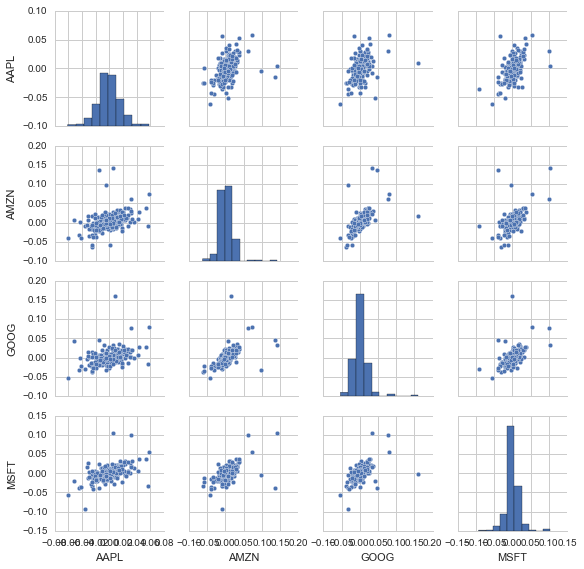

In [23]:
sns.pairplot(tech_rets.dropna(),size=2)

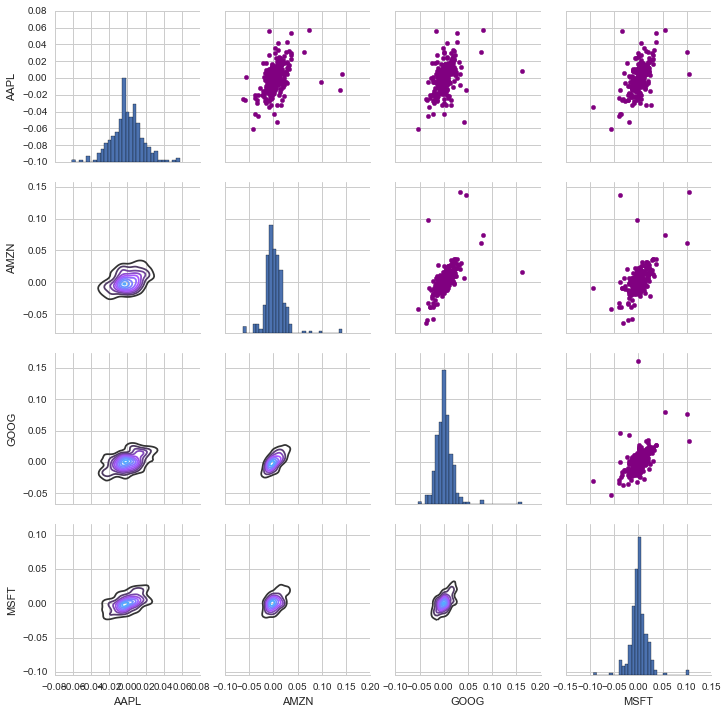

In [24]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap= 'cool_d')

returns_fig.map_diag(plt.hist,bins=30)

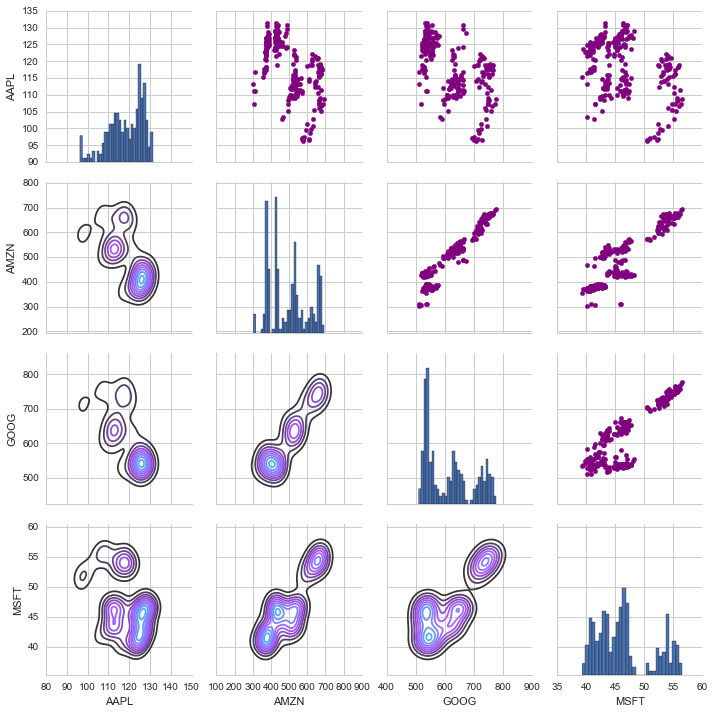

In [25]:
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap= 'cool_d')

returns_fig.map_diag(plt.hist,bins=30)

/Users/abhisheksubramanian/anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/Users/abhisheksubramanian/anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


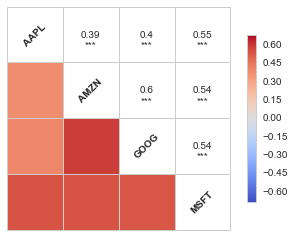

In [26]:
sns.corrplot(tech_rets.dropna(),annot=True)

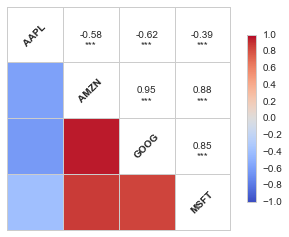

In [27]:
sns.corrplot(closing_df,annot=True)

### Risk Analysis

Out of many methods available for quantifying risk, the most basic one i.e the relation between the expected return with standard deviation is carried on here

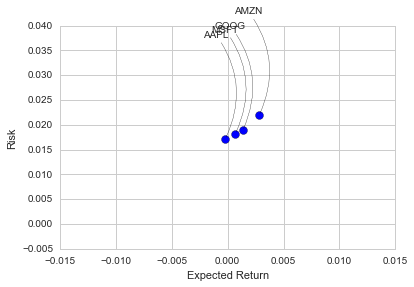

In [28]:
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s = area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (3, 100),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))


## Value at Risk

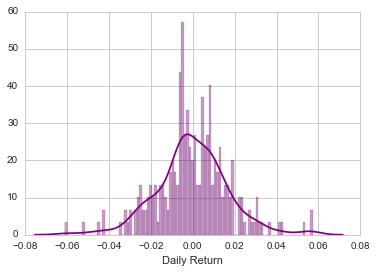

In [29]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [30]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-01-26,0.001062,-0.008739,-0.008779,-0.003603
2015-01-27,-0.035013,-0.009397,-0.030978,-0.092533
2015-01-28,0.056533,-0.009258,-0.016640,-0.034459
2015-01-29,0.031134,0.025896,0.001294,0.019908
2015-01-30,-0.014634,0.137116,0.046724,-0.038324


In [31]:
rets['AAPL'].quantile(0.05)

-0.026598017594236523

The above indicates that the loss will not be greater than 2.6% in the 95% confidence interval

## Montecarlo Method - Using the Geometric Brownian motion

In [68]:
#time horizon
days =365

dt = 1/days

mu = rets.mean()['AAPL']

sigma = rets.std()['AAPL']


def stock_monte_carlo(start_price,days,mu,sigma):
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price


In [69]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2015-01-23,112.300003,113.750000,111.529999,112.980003,46464800,111.087261,NaN,NaN,NaN,NaN
2015-01-26,113.739998,114.360001,112.800003,113.099998,55615000,111.205246,NaN,NaN,NaN,0.001062
2015-01-27,112.419998,112.480003,109.029999,109.139999,95568700,107.311588,NaN,NaN,NaN,-0.035013
2015-01-28,117.629997,118.120003,115.309998,115.309998,146477100,113.378221,NaN,NaN,NaN,0.056533
2015-01-29,116.320000,119.190002,115.559998,118.900002,84436400,116.908082,NaN,NaN,NaN,0.031134


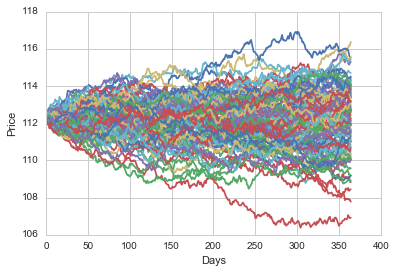

In [71]:
start_price = 112.30

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
    
plt.xlabel('Days')
plt.ylabel('Price')

In [73]:
runs =10000
simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

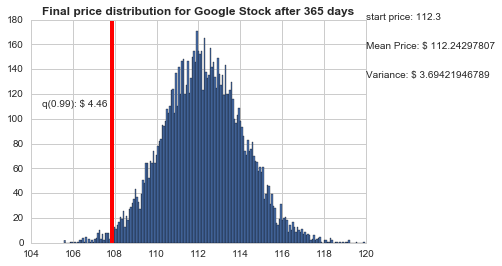

In [94]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.9,0.9, s='start price: %s' %start_price)
plt.figtext(0.9,0.8,'Mean Price: $ %s' %simulations.mean())

plt.figtext(0.9,0.7,"Variance: $ %s" %simulations.var())

# Display 1% quantile

plt.figtext(0.15,0.6,'q(0.99): $ %.2f' %(start_price - q,))
plt.axvline(x=q,linewidth=4,color='r')

plt.title("Final price distribution for Google Stock after %s days" % days, weight='bold');